# Example of using ESPN Fantasy Football API

First I will import from a few of my other files that pull data into a csv and calculate expected wins. 
I will also import csv since I will be reading from a csv file.

In [1]:
from PullMatchupData import *
from ExpectedWinsCalculation import *

import csv

Let's initialize a few values

In [2]:
league_id = 348540 # unique id for the league
years = [2022] # array of years I want to work with

wins_dict = {} # dictionary that will store the number of wins for each team
expected_wins_dict = {} # dictionary that will store the number of expected wins for each team

For each year, I will pull the matchup data for that year and then calculate the expected wins. 
All of this data will be stored in csv files that I will reference later.

In [3]:
for year in years:
    pullMatchupData(league_id, year)

for year in years:
    calculateExpectedWins(league_id, year)


Now I will open the csv and read through it. Each row has a team and I will fill the dictionarys with the wins and expected wins using the team name as the key. I will show the first few rows of the csv so that you can understand how the data is currently stored. 

In [4]:
df = pd.read_csv(f'{league_id}_{year}_standings.csv')
df.head(5)

,Unnamed: 0,Team Name,Wins,Expected Wins
0,0,SIEB,5,6.38
1,1,kamr,5,5.38
2,2,JD,10,9.08
3,3,Zac,5,6.85
4,4,ALEX,7,7.15


In [5]:
for year in years:
        with open(f'{league_id}_{year}_standings.csv', "r") as f:
            # Create a CSV reader
            reader = csv.reader(f)
            
            # Skip the header row
            next(reader)

            for row in reader:
                if row[1]:
                    name = row[1] + f' {year}'
                    # name = name[:6] + name[-5:]
                    wins = int(row[2]) 
                    expected_wins = float(row[3])         
                    wins_dict[name] =  wins 
                    expected_wins_dict[name] = expected_wins 

I will loop through all of the teams and plot the difference between their wins and expected wins on a chart. The team names will be used as the label. 

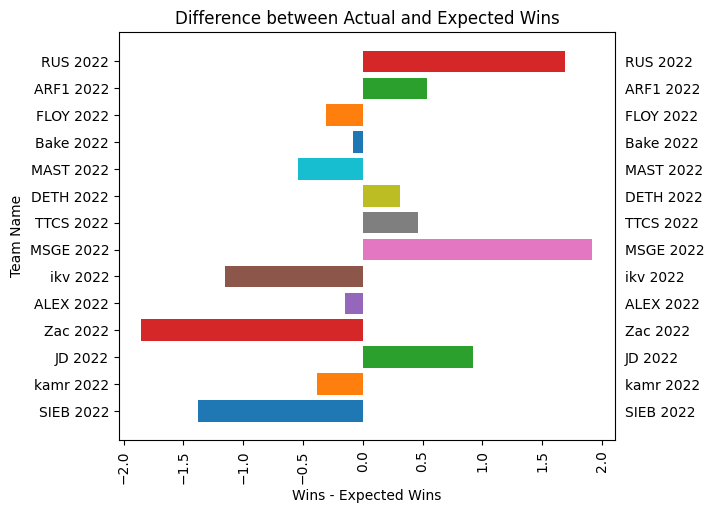

In [6]:
for team in wins_dict:
    diff = wins_dict.get(team, 0) - expected_wins_dict.get(team, 0)
    plt.barh(str(team), diff)
plt.xlabel('Wins - Expected Wins')
plt.ylabel('Team Name')
plt.title('Difference between Actual and Expected Wins')
plt.xticks(rotation=90)
plt.subplots_adjust(top=.95, bottom=0.1)
plt.tick_params(labelright=True)
plt.show()  